In [145]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
fobj = lambda x: sum(x**2)/len(x)
bounds = [(-5,5)]*4
popsize = 10
mut = 0.8
crossp = 0.7
its = 1000

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(max_b - min_b)
    pop_denorm = min_b + pop*diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]

    for i in range(its):
        for j in range(popsize):
            target = pop[j]
            idxs = [idx for idx in range(popsize) if idx != j]
            selected = np.random.choice(idxs, 3, replace=False)
            a, b, c = pop[selected]
            mutant = np.clip(a + mut*(b-c), 0, 1)    
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial*diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

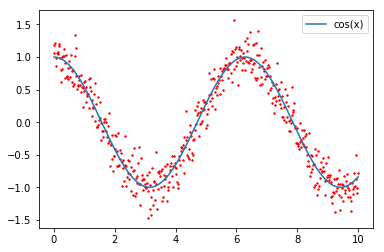

In [199]:
x = np.linspace(0,10,500)
y = np.cos(x) + np.random.normal(0, 0.2, 500)
plt.scatter(x, y, s=2, c='red')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()
plt.show()

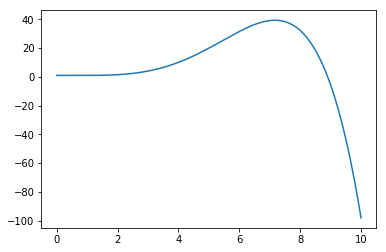

In [200]:
def fmodel(x, w):
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4 + w[5]*x**5
plt.plot(x, fmodel(x, [1,-0.01,0.01,-0.1,0.1,-0.01]))
plt.show()

In [215]:
def rmse(w):
    y_pred = fmodel(x, w)
    return np.sqrt(sum((y - y_pred)**2)) / len(y)

In [216]:
result = list(de(rmse, [(-5,5)]*6, its=2000))

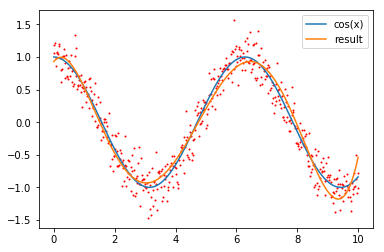

In [217]:
plt.scatter(x, y, s=1, c='red')
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, fmodel(x, result[-1][0]), label='result')
plt.legend()
plt.show()